In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# Load the data from CSV files
t_df = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\train.csv')
test_df = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\test.csv')
sub_df = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\gender_submission.csv')

In [7]:
# Preprocess the data
t_df = t_df.drop([ 'PassengerId','Name', 'Ticket', 'Cabin', 'Fare'], axis=1)
test_df = test_df.drop([ 'PassengerId','Name', 'Ticket', 'Cabin', 'Fare'], axis=1)


In [8]:
t_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [9]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S
2,2,male,62.0,0,0,Q
3,3,male,27.0,0,0,S
4,3,female,22.0,1,1,S
...,...,...,...,...,...,...
413,3,male,NaN,0,0,S
414,1,female,39.0,0,0,C
415,3,male,38.5,0,0,S
416,3,male,NaN,0,0,S


In [10]:
t_df['Family'] = t_df['SibSp'] + t_df['Parch'] + 1
test_df['Family'] = test_df['Parch'] + test_df['Parch'] + 1
t_df = t_df.drop(['SibSp','Parch'],axis = 1)
test_df =  test_df.drop(['SibSp','Parch'],axis = 1)

In [11]:
t_df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Embarked      2
Family        0
dtype: int64

In [12]:
# Fill missing values
t_df['Age'].fillna(t_df['Age'].median(),inplace = True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
t_df["Embarked"] = t_df["Embarked"].fillna("S")
test_df["Embarked"] = test_df["Embarked"].fillna("S")

In [13]:
# Convert categorical variables to numerical
t_df.Sex.replace(['female', 'male'], [0,1], inplace=True)
test_df.Sex.replace(['female','male'], [0,1], inplace=True)

#Convert categorical variables to numerical for Embarked
t_df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
test_df.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [14]:
t_df

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,1,22.0,1,2
1,1,1,0,38.0,2,2
2,1,3,0,26.0,1,1
3,1,1,0,35.0,1,2
4,0,3,1,35.0,1,1
...,...,...,...,...,...,...
886,0,2,1,27.0,1,1
887,1,1,0,19.0,1,1
888,0,3,0,28.0,1,4
889,1,1,1,26.0,2,1


In [15]:
test_df

,Pclass,Sex,Age,Embarked,Family
0,3,1,34.5,3,1
1,3,0,47.0,1,1
2,2,1,62.0,3,1
3,3,1,27.0,1,1
4,3,0,22.0,1,3
...,...,...,...,...,...
413,3,1,27.0,1,1
414,1,0,39.0,2,1
415,3,1,38.5,1,1
416,3,1,27.0,1,1


In [16]:
# Separate features and labels
x_train = t_df.drop('Survived', axis=1).values
y_train = t_df['Survived'].values
x_test = test_df.values

In [17]:
x_train

array([[ 3.,  1., 22.,  1.,  2.],
       [ 1.,  0., 38.,  2.,  2.],
       [ 3.,  0., 26.,  1.,  1.],
       ...,
       [ 3.,  0., 28.,  1.,  4.],
       [ 1.,  1., 26.,  2.,  1.],
       [ 3.,  1., 32.,  3.,  1.]])

In [18]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [19]:
x_test

array([[ 3. ,  1. , 34.5,  3. ,  1. ],
       [ 3. ,  0. , 47. ,  1. ,  1. ],
       [ 2. ,  1. , 62. ,  3. ,  1. ],
       ...,
       [ 3. ,  1. , 38.5,  1. ,  1. ],
       [ 3. ,  1. , 27. ,  1. ,  1. ],
       [ 3. ,  1. , 27. ,  2. ,  3. ]])

In [20]:
#finding the optimal k value using cross validation
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

X_1, X_test, y_1, y_test = train_test_split(x_train,y_train, test_size=0.3)
X_tr, X_cv, y_tr, y_cv = train_test_split(X_1, y_1, test_size=0.3)

final_scores = []
for i in range(1,30,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_tr, y_tr)
    pred = knn.predict(X_cv)
    acc = accuracy_score(y_cv, pred, normalize=True) * float(100)
    final_scores.append(acc)
    print('\n CV accuracy for k=%d is %d'%(i,acc))


 CV accuracy for k=1 is 70

 CV accuracy for k=3 is 74

 CV accuracy for k=5 is 72

 CV accuracy for k=7 is 73

 CV accuracy for k=9 is 72

 CV accuracy for k=11 is 74

 CV accuracy for k=13 is 73

 CV accuracy for k=15 is 74

 CV accuracy for k=17 is 72

 CV accuracy for k=19 is 72

 CV accuracy for k=21 is 72

 CV accuracy for k=23 is 71

 CV accuracy for k=25 is 67

 CV accuracy for k=27 is 66

 CV accuracy for k=29 is 65


In [21]:
# implementation of knn algorithm from scratch

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(x_train, y_train, x_test, k):
    predictions = []
    for test_sample in x_test:
        distances = []
        for train_sample, train_label in zip(x_train, y_train):
            distance = euclidean_distance(test_sample, train_sample)
            distances.append((train_sample, train_label, distance))
        distances.sort(key=lambda x: x[2])
        neighbors = distances[:k]
        class_votes = {}
        for neighbor in neighbors:
            label = neighbor[1]
            if label in class_votes:
                class_votes[label] += 1
            else:
                class_votes[label] = 1
        predicted_class = max(class_votes, key=class_votes.get)
        predictions.append(predicted_class)
    return predictions

In [22]:
# Set the number of neighbors
k = 1

# Run K-Nearest Neighbors algorithm
knn_predictions = k_nearest_neighbors(x_train, y_train, x_test,k)



In [23]:
# Calculate accuracy score
y_train_pred = k_nearest_neighbors(x_train, y_train, x_train, k)
accuracy = np.mean(y_train_pred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 90.24%


In [24]:
#Naive Bayes
import warnings
warnings.filterwarnings("ignore")

def cal_prior_prob(label):
    unique_label, count = np.unique(label, return_counts=True)
    return count / len(label)

In [25]:
#calculate likelihood
def callike(features, labels, feature_value, label_value):
    num = np.sum((features == feature_value) & (labels == label_value))
    den = np.sum(labels == label_value)
    return num / den

In [26]:
#calculate posterior probability

def cal_post_prob(features, labels, test_sample):
    num_samples, num_features = features.shape
    num_labels = len(np.unique(labels))
    posterior_probs = np.zeros(num_labels)
    
    for label_value in range(num_labels):
        likelihood = 1.0
        for feature_i in range(num_features):
            feature_value = test_sample[feature_i]
            likelihood *= callike(features[:, feature_i], labels, feature_value, label_value)
        prior_prob = cal_prior_prob(labels)[label_value]
        posterior_probs[label_value] = likelihood * prior_prob
    
    return posterior_probs / np.sum(posterior_probs)


In [27]:

def naive_bayes(x_train, y_train, x_test):
    pred = []
    for test_samp in x_test:
        post_probs = cal_post_prob(x_train, y_train, test_samp)
        pred_class = np.argmax(post_probs)
        pred.append(pred_class)
    return pred

In [28]:
df = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\train.csv')

In [29]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


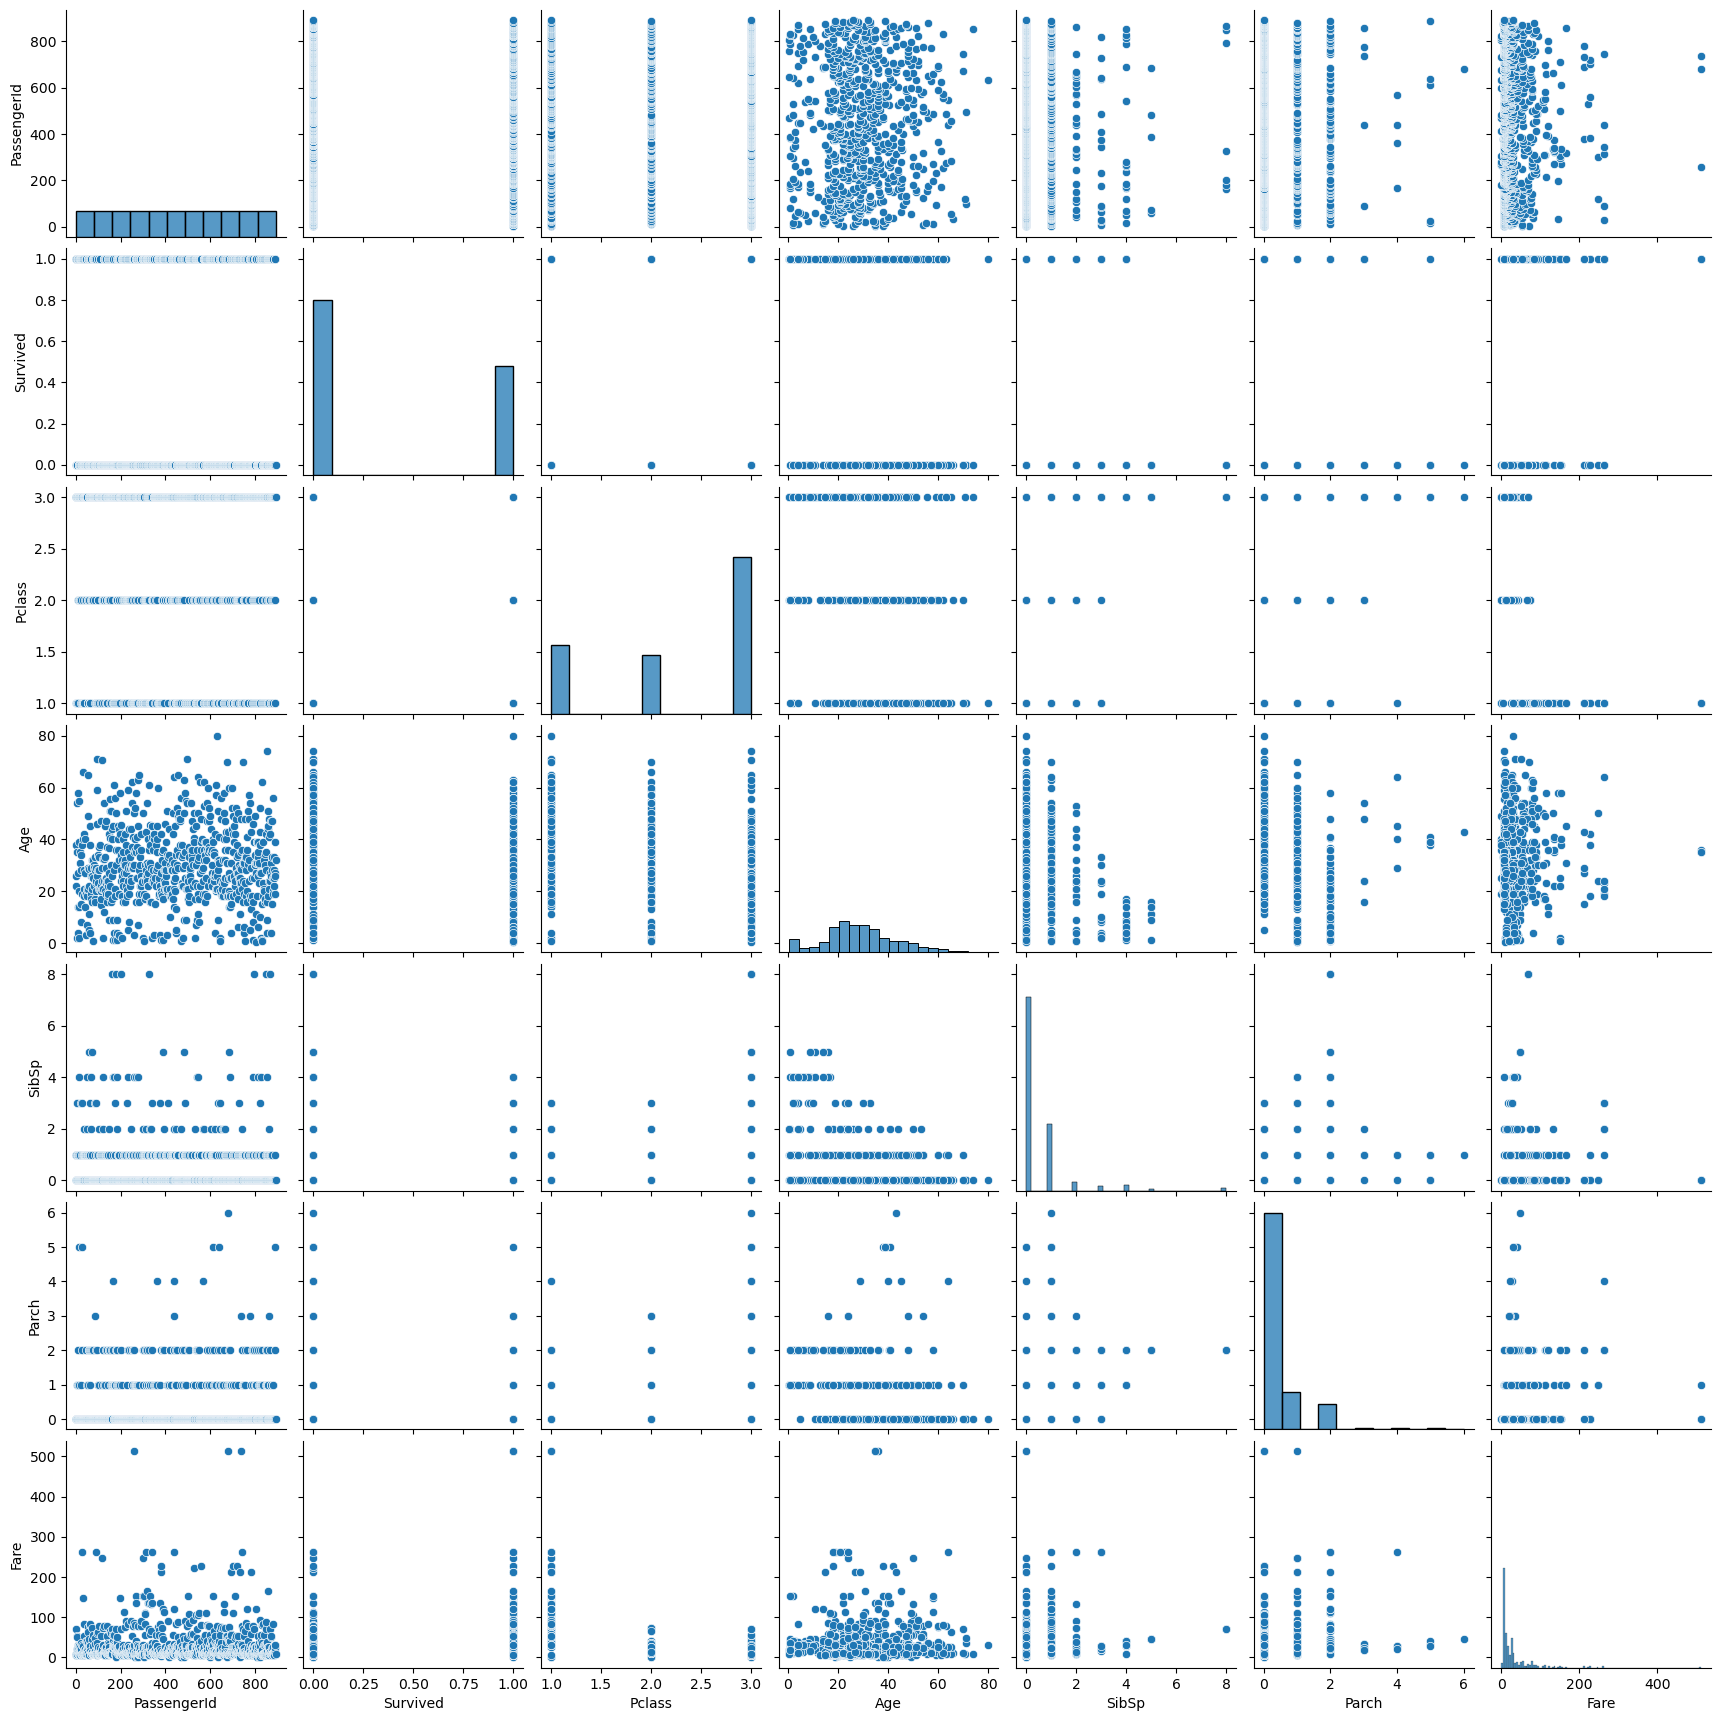

In [30]:
import seaborn as sns
#plotting continous numeric features
cont_num_feat = ['Age', 'Fare', 'Parch', 'SibSp']
sns.pairplot(df)
plt.show()

  

In [31]:
# Load the data 
td = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\train.csv')
testd = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\test.csv')
submission_data = pd.read_csv('C:\\Users\\Admin\\Desktop\\IIT Delhi\\Naive Bayes and KNN\\gender_submission.csv')

In [32]:
# Preprocess the data
td = td.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)
testd = testd.drop(['PassengerId', 'Name', 'Ticket', 'Cabin','Fare'], axis=1)

In [33]:
td['Family'] = td['SibSp'] + td['Parch'] + 1
testd['Family'] = testd['Parch'] + testd['Parch'] + 1
td = td.drop(['SibSp','Parch'],axis = 1)
testd =  testd.drop(['SibSp','Parch'],axis = 1)

In [34]:
# Convert categorical variables to numerical
td.Sex.replace(['female', 'male'], [0,1], inplace=True)
testd.Sex.replace(['female','male'], [0,1], inplace=True)

#Convert categorical variables to numerical for Embarked
td.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)
testd.Embarked.replace(['S', 'C', 'Q'], [1, 2, 3], inplace=True)

In [35]:
# Fill missing values
td['Age'].fillna(td['Age'].median(),inplace = True)
testd['Age'].fillna(testd['Age'].median(), inplace=True)
td["Embarked"] = td["Embarked"].fillna("S")
testd["Embarked"] = testd["Embarked"].fillna("S")

In [36]:


# Separate features and labels
x_train = td.drop('Survived', axis=1).values
y_train = td['Survived'].values
x_test = testd.values

In [37]:
# Run Naive Bayes algorithm
naive_bayes_predictions = naive_bayes(x_train, y_train, x_test)

# Prepare submission file
submission_data['Survived'] = naive_bayes_predictions
submission_data.to_csv('naive_bayes_submission.csv', index=False)

# Calculate accuracy score
y_trainpred = naive_bayes(x_train, y_train, x_train)
accuracy = np.mean(y_trainpred == y_train) * 100
print(f"Accuracy on training data: {accuracy:.2f}%")

Accuracy on training data: 81.48%
